In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.append(rf"D:\code\pywfn")
from pywfn.base import Mol
from pywfn.reader import LogReader
from pywfn.atomprop import activity,direction
# from pywfn.bondprop import piDM
from pywfn.maths import points_rotate
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from pywfn.utils import printer
printer.ifShell=False

In [2]:
root="D:/code/POCV/paper/mols/Fig6.neNHC"
# root=r'D:\BaiduSyncdisk\Articles\HFV\gfile\NHC\NHC-wfn'
names=['NHC-wfn','since4_s_wfn']
atoms=[1,13]
results={}
for n,name in enumerate(names):
    mn=Mol(LogReader(f'{root}/{name}-.log'))
    m0=Mol(LogReader(f'{root}/{name}0.log'))
    mp=Mol(LogReader(f'{root}/{name}+.log'))
    # mols=[mn,m0,mp]
    
    for m,mol in enumerate([mn,m0,mp]):
        caler=activity.Calculator(mol)
        dirCaler=direction.Calculator(mol)
        dirs=dirCaler.reactions(atoms[n])
        result=caler.freeValence(atoms[n],dirs)
        results[f'{n},{m}']=result

束缚键级 1 [[ 1.      6.      1.      0.0011 -0.      0.7612]
 [ 1.      7.      1.      0.0011 -0.      0.7612]
 [ 1.      6.      0.985  -0.1318  0.1118  0.7515]
 [ 1.      7.      0.985  -0.1318  0.1118  0.761 ]
 [ 1.      6.      0.94   -0.2607  0.2202  0.7233]
 [ 1.      7.      0.94   -0.2607  0.2202  0.7613]
 [ 1.      6.      0.8665 -0.3816  0.3219  0.6793]
 [ 1.      7.      0.8665 -0.3816  0.3219  0.7645]
 [ 1.      6.      0.7666 -0.491   0.4138  0.6241]
 [ 1.      7.      0.7666 -0.491   0.4138  0.7728]
 [ 1.      6.      0.6435 -0.5855  0.4931  0.5636]
 [ 1.      7.      0.6435 -0.5855  0.4931  0.7867]
 [ 1.      6.      0.5008 -0.6621  0.5575  0.5053]
 [ 1.      7.      0.5008 -0.6621  0.5575  0.8047]
 [ 1.      6.      0.3428 -0.7187  0.6049  0.4567]
 [ 1.      7.      0.3428 -0.7187  0.6049  0.8229]
 [ 1.      6.      0.1745 -0.7534  0.634   0.4244]
 [ 1.      7.      0.1745 -0.7534  0.634   0.8365]
 [ 1.      6.      0.0009 -0.7652  0.6438  0.413 ]
 [ 1.      7.      0.000

In [3]:
for atm,dx,dy,dz,val in results['1,1']:
    print(f'{atm:>3.0f}{dx:>10.4f}{dy:>10.4f}{dz:>10.4f}{val:>10.4f}')

 13    0.0533   -0.8157    0.5760    1.8289
 13    0.2114   -0.8364    0.5056    1.8427
 13    0.3631   -0.8318    0.4199    1.8831
 13    0.5038   -0.8018    0.3214    1.9435
 13    0.6291   -0.7475    0.2132    2.0145
 13    0.7354   -0.6705    0.0985    2.0866
 13    0.8193   -0.5731   -0.0192    2.1512
 13    0.8783   -0.4582   -0.1364    2.2019
 13    0.9106   -0.3295   -0.2494    2.2346
 13    0.9153   -0.1908   -0.3548    2.2471
 13    0.8921   -0.0462   -0.4494    2.2382
 13    0.8419    0.0997   -0.5304    2.2083
 13    0.7660    0.2427   -0.5952    2.1590
 13    0.6669    0.3782   -0.6420    2.0945
 13    0.5475    0.5023   -0.6693    2.0214
 13    0.4115    0.6111   -0.6762    1.9486
 13    0.2630    0.7013   -0.6626    1.8864
 13    0.1065    0.7702   -0.6289    1.8443
 13   -0.0533    0.8157   -0.5760    1.8289
 13    0.0533   -0.8157    0.5760    1.8289
 13    0.2258   -0.7954    0.5625    1.8483
 13    0.3916   -0.7509    0.5318    1.8999
 13    0.5454   -0.6836    0.485

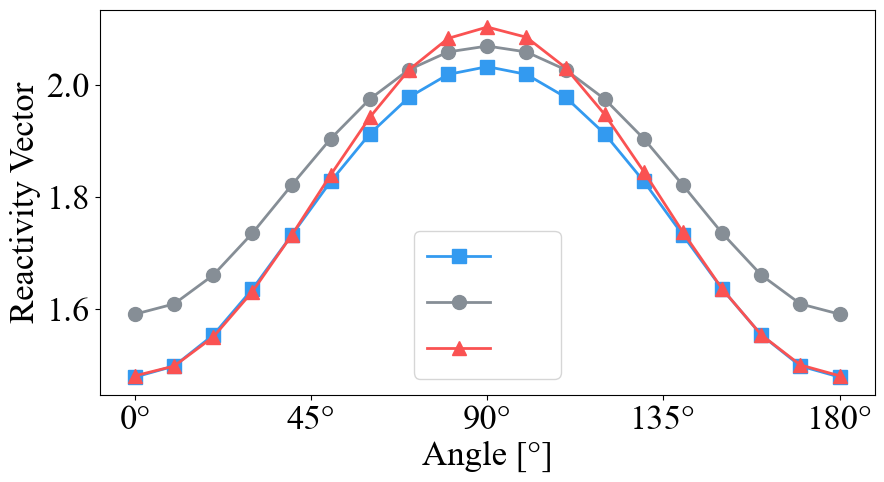

In [11]:
import matplotlib.pyplot as plt
import numpy as np
cs=['#339af0','#868e96','#fa5252']
ms=['s','o','^']
xs=np.linspace(0,180,19)
xts=np.linspace(0,180,17,endpoint=True)[::4]
xtl=[f'{e:.0f}°' for e in xts]
fig,axs=plt.subplots(1,1,figsize=(10,5))
plt.rc('font',family='Times New Roman',size=25)
labels=['    ','    ','    ']
for i in range(3):
    axs.plot(xs,results[f'0,{i}'][19:19*2,-1],color=cs[i],marker=ms[i],lw=2,ms=10,label=labels[i])
axs.set_xticks(xts,xtl)
plt.legend(fontsize=23, loc=8)
plt.xlabel('Angle [°]')
plt.ylabel('Reactivity Vector')
plt.savefig('图像/反极性卡宾/NHC.png',bbox_inches='tight',dpi=300)
plt.show()


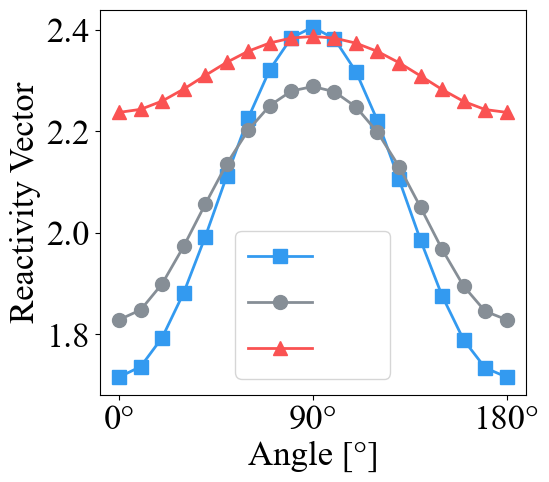

In [16]:
# from matplotlib import rcParams
# rcParams['mathtext.fontset'] = 'stix'
# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = ['Times New Roman']
# rcParams['text.usetex'] = True
# rcParams['text.latex.preamble'] = r'\usepackage{amsmath} \usepackage{newtxmath}'
cs=['#339af0','#868e96','#fa5252']
ms=['s','o','^']
xs=np.linspace(0,180,19)
xts=np.linspace(0,180,17,endpoint=True)[::8]
xtl=[f'{e:.0f}°' for e in xts]
fig,axs=plt.subplots(1,1,figsize=(5.5,5))
plt.rc('font',family='Times New Roman',size=25)
labels=['     ']*3
for i in range(3):
    axs.plot(xs,results[f'1,{i}'][19*1:19*2,-1],color=cs[i],marker=ms[i],lw=2,ms=10,label=labels[i])
axs.set_xticks(xts,xtl)
plt.legend(fontsize=23, loc=8)

plt.xlabel('Angle [°]')
plt.ylabel('Reactivity Vector')
plt.savefig('图像/反极性卡宾/since.png',bbox_inches='tight',dpi=300)